Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# LAB10

Use reinforcement learning to devise a tic-tac-toe player.

### Deadlines:

* Submission: [Dies Natalis Solis Invicti](https://en.wikipedia.org/wiki/Sol_Invictus)
* Reviews: [Befana](https://en.wikipedia.org/wiki/Befana)

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [4]:
import random
import scripts.tictactoe as ttt
import scripts.minmax as mm

# Description

Instructions for running the scripts and file structure are available on the README.md file in the root of the repository.
This notebook is used to train the agent and to show the results.

# MinMax

To play against the MinMax player:
1. Install the requirements: `pip install -r scripts/requirements.txt`
2. Run the game: `python3 runner.py`

# Reinforcement Learning

## Training

In [2]:
import scripts.qlearning as qlearning

In [1]:
# Training
episodes = 1000000

# Parameters
gamma = 0.98
alpha = 0.1

Episode 0, average reward: 1.00
Epsilon: 1.0
Episode 10000, average reward: 0.01
Epsilon: 0.9174311169092816
Episode 20000, average reward: 0.08
Epsilon: 0.8474574978453372
Episode 30000, average reward: 0.13
Epsilon: 0.7874014074026829
Episode 40000, average reward: 0.17
Epsilon: 0.7352939230102375
Episode 50000, average reward: 0.24
Epsilon: 0.6896549583827299
Episode 60000, average reward: 0.26
Epsilon: 0.649350421656118
Episode 70000, average reward: 0.31
Epsilon: 0.6134966953967457
Episode 80000, average reward: 0.33
Epsilon: 0.5813951054622706
Episode 90000, average reward: 0.33
Epsilon: 0.5524859405999671
Episode 100000, average reward: 0.38
Epsilon: 0.5263155401660737
Episode 110000, average reward: 0.39
Epsilon: 0.5025123128202577
Episode 120000, average reward: 0.41
Epsilon: 0.48076898113893324
Episode 130000, average reward: 0.43
Epsilon: 0.4608292446217717
Episode 140000, average reward: 0.45
Epsilon: 0.4424776294148803
Episode 150000, average reward: 0.46
Epsilon: 0.425531

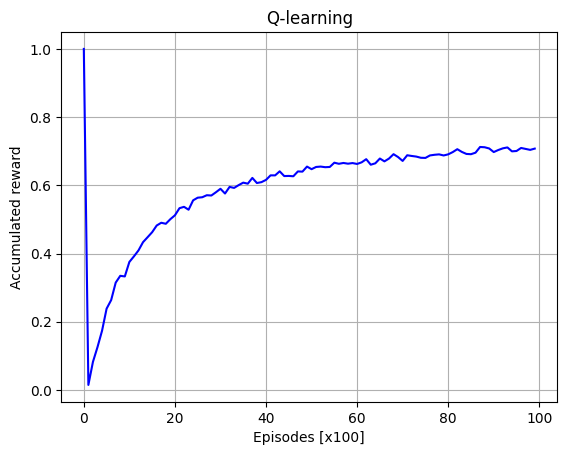

Saving Q-values to file...


In [4]:
# Run training against random player
qlearning.train(
    episodes,
    gamma=gamma,
    alpha=alpha,
    plot=True,
    filename="scripts/q_values.npy",
)

Episode 0, average reward: -1.00
Epsilon: 1.0
Episode 10000, average reward: -0.90
Epsilon: 0.9174311169092816
Episode 20000, average reward: -0.89
Epsilon: 0.8474574978453372
Episode 30000, average reward: -0.88
Epsilon: 0.7874014074026829
Episode 40000, average reward: -0.89
Epsilon: 0.7352939230102375
Episode 50000, average reward: -0.88
Epsilon: 0.6896549583827299
Episode 60000, average reward: -0.87
Epsilon: 0.649350421656118
Episode 70000, average reward: -0.87
Epsilon: 0.6134966953967457
Episode 80000, average reward: -0.87
Epsilon: 0.5813951054622706
Episode 90000, average reward: -0.86
Epsilon: 0.5524859405999671
Episode 100000, average reward: -0.85
Epsilon: 0.5263155401660737
Episode 110000, average reward: -0.85
Epsilon: 0.5025123128202577
Episode 120000, average reward: -0.85
Epsilon: 0.48076898113893324
Episode 130000, average reward: -0.84
Epsilon: 0.4608292446217717
Episode 140000, average reward: -0.83
Epsilon: 0.4424776294148803
Episode 150000, average reward: -0.82
E

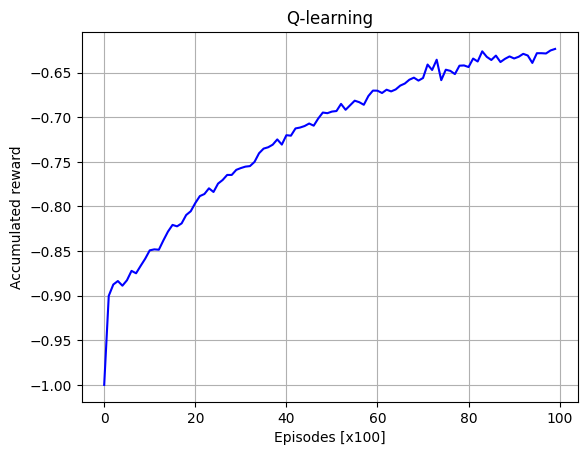

Saving Q-values to file...


In [5]:
# Run training against MinMax player
qlearning.train(
    episodes,
    gamma=gamma,
    alpha=alpha,
    plot=True,
    filename="scripts/q_values_mm.npy",
    opponent=mm.resulting_board,
)


## Playing

To play against the trained agent, run `python3 runner.py -t Q`

# Comparison

In [14]:
def switch_player(player):
    if player == ttt.X:
        return ttt.O
    else:
        return ttt.X

In [25]:
def combat(player1, player2, games, filename="scripts/q_values.npy"):
    won=0
    loss=0
    draw=0
    for i in range(games):
        # Winning rate against random player
        ai = random.choice([ttt.X, ttt.O])
        board=ttt.initial_state()
        player=ttt.X
        while not ttt.terminal(board):
            if player==ai:
                if player1==qlearning.play:
                    move=qlearning.play(board,filename=filename)
                else:
                    move=player1(board)
            else:
                move=player2(board)
            board=ttt.result(board,move)
            player=switch_player(player)
            
        if ttt.winner(board)==ai:
            won+=1
        elif ttt.winner(board) is None:
            draw+=1
        else:
            loss+=1
            
    print("Player 1 Lost games: {} %".format(loss/games*100))
    print("Player 1 Drawed games: {} %".format(draw/games*100))
    print("Player 1 Won games: {} %".format(won/games*100))


In [23]:
# MinMax vs Random
games=1000

player1=mm.play
player2=ttt.random_move
combat(player1, player2, games)

Player 1 Lost games: 0.0 %
Player 1 Drawed games: 9.9 %
Player 1 Won games: 90.10000000000001 %


In [26]:
# QLearning vs Random
games=1000

player1=qlearning.play
player2=ttt.random_move
combat(player1, player2, games)

Player 1 Lost games: 4.0 %
Player 1 Drawed games: 11.5 %
Player 1 Won games: 84.5 %


In [27]:
# MinMax vs QLearning (trained against random)
games=1000

player1=mm.play
player2=qlearning.play
combat(player1, player2, games)

Player 1 Lost games: 0.0 %
Player 1 Drawed games: 52.400000000000006 %
Player 1 Won games: 47.599999999999994 %


In [30]:
# MinMax vs QLearning (trained against minmax)
games=1000

player1=mm.play
player2=qlearning.play
combat(player1, player2, games, filename="scripts/q_values_mm.npy")

Player 1 Lost games: 0.0 %
Player 1 Drawed games: 50.1 %
Player 1 Won games: 49.9 %


# Conclusions
- The MinMax strategy is significantly better than the random and the Q-learning strategies, as expected.
- The Q-learning strategy is better than the random strategy, demonstrating the usefulness of the reinforcement learning approach for scenarios where the optimal strategy is not known or where MinMax is unfeasible.
- When trained against MinMax, the Q-learning strategy is better at playing against MinMax. Nevertheless, it is still worse than MinMax.